In [1]:
from qiskit import *
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import numpy as np
from time import time
from math import pi
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_distribution
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit_aer import AerSimulator

In [2]:
import numpy as np
from math import sqrt

# Given distribution values
values = [1, np.cbrt(4) ** 2, np.cbrt(6) ** 2, np.cbrt(4) ** 2, np.cbrt(1) ** 2]

# Calculate normalization constant T (sum of values)
T = sum(values)

# Normalize the values to get the probability distribution
prob_distribution = [x / T for x in values]

# Output the probability distribution
for i, prob in enumerate(prob_distribution, start=-2):
    print(f"P(d_{i}) = {prob:.4f}")

P(d_-2) = 0.0967
P(d_-1) = 0.2437
P(d_0) = 0.3193
P(d_1) = 0.2437
P(d_2) = 0.0967


In [3]:
# Function to generate binary code for a number
def bin_code(m, n):
    return [int(b) for b in bin(m)[2:].zfill(n)]  # convert to binary list of length n

# Function to generate Gray code for a number
def gray_code(m, n):
    gray_value = m ^ (m >> 1)
    mid = [int(b) for b in bin(gray_value)[2:].zfill(n)]  # convert to Gray code list of length n
    mid.reverse()
    return mid

def inner_product(list1, list2):
    return sum(x * y for x, y in zip(list1, list2))

# print(gray_code(4,5))

In [4]:
#prob_distribution : [-3, -2, -1, 0, 1, 2, 3]
# -> [0,1,2,4,-3,-2,-1]

prob = [0 for i in range(8)]
prob[0] = prob_distribution[2] # 000 = 0
prob[1] = prob_distribution[3] # 001 = 1
prob[2] = prob_distribution[4] # 010 = 2
prob[3] = 0 # 011 = 3
prob[4] = 0 # 100 = 4
prob[5] = 0 # 101 = -3
prob[6] = prob_distribution[0] # 110 = -2
prob[7] = prob_distribution[1] # 111 = -1



a = sum([prob[i] for i in range(8)])
print(f'sum of prob : {a}')

for i in range(8):
    prob[i] = sqrt(prob[i])

b = sum([prob[i]**2 for i in range(8)])
print(f'sum of prob : {b}')


for i in range(8):
    print(prob[i])

print('-----------------')

for i in range(8):
    print(prob[i]**2)   

sum of prob : 0.9999999999999998
sum of prob : 0.9999999999999999
0.5650535943375512
0.4936197815423142
0.3109609767048352
0.0
0.0
0.0
0.3109609767048352
0.4936197815423142
-----------------
0.31928556447378587
0.24366048872988197
0.09669672903322506
0.0
0.0
0.0
0.09669672903322506
0.24366048872988197


In [5]:
d1 = sqrt(prob[0]**2 + prob[1]**2)
if d1 == 0:
    ay1 = 0
else:
    ay1 = prob[1] / d1
    ay1 = 2 * np.arcsin(ay1)

d2 = sqrt(prob[2]**2 + prob[3]**2)
if d2 == 0:
    ay2 = 0
else:
    ay2 = prob[3] / d2
    ay2 = 2 * np.arcsin(ay2)

d3 = sqrt(prob[4]**2 + prob[5]**2)
if d3 == 0:
    ay3 = 0
else:
    ay3 = prob[5] / d3
    ay3 = 2 * np.arcsin(ay3)

d4 = sqrt(prob[6]**2 + prob[7]**2)
if d4 == 0:
    ay4 = 0
else:
    ay4 = prob[7] / d4
    ay4 = 2 * np.arcsin(ay4)

In [6]:
# Define a 4x4 matrix
N = 2
n = 2 ** N 
Minv = np.zeros((n, n))  
for i in range(n):
    for j in range(n):
        b = bin_code(j, N)
        g = gray_code(i, N)
        exp = inner_product(b,g)
        Minv[i][j] = ((-1)**exp)/(n)


# Define a 4x4 matrix
N = 2
n = 2 ** N 
M = np.zeros((n, n))  
for i in range(n):
    for j in range(n):
        b = bin_code(i, N)
        g = gray_code(j, N)
        exp = inner_product(b,g)
        M[i][j] = ((-1)**exp)

# # Multiply the matrix by the vector
# print(M)
# print(Minv)

# print(np.matmul(M, Minv))

In [7]:
def get_Minv(N):
    n = 2 ** N 
    Minv = np.zeros((n, n))  
    for i in range(n):
        for j in range(n):
            b = bin_code(j, N)
            g = gray_code(i, N)
            exp = inner_product(b,g)
            Minv[i][j] = ((-1)**exp)/(n)
    return Minv

In [8]:
# Define a length-4 vector
vector_alpha_1 = np.array([ay1, ay2, ay3, ay4])
print(vector_alpha_1)

vector_theta_1 = np.matmul(Minv, vector_alpha_1)

print(vector_theta_1)

[1.4360509  0.         0.         2.01727568]
[ 0.86333165 -0.1453062   0.86333165 -0.1453062 ]


In [9]:
prob2 = [0 for i in range(4)]
prob2[0] = sqrt(prob[0]**2 + prob[1]**2)
prob2[1] = sqrt(prob[2]**2 + prob[3]**2)
prob2[2] = sqrt(prob[4]**2 + prob[5]**2)
prob2[3] = sqrt(prob[6]**2 + prob[7]**2)

In [10]:
d1 = sqrt(prob2[0]**2 + prob2[1]**2)
if d1 == 0:
    ay1 = 0
else:
    ay1 = prob2[1] / d1
    ay1 = 2 * np.arcsin(ay1)

d2 = sqrt(prob2[2]**2 + prob2[3]**2)
if d2 == 0:
    ay2 = 0
else:
    ay2 = prob2[3] / d2
    ay2 = 2 * np.arcsin(ay2)

In [11]:
vector_alpha_2 = np.array([ay1, ay2])
# print(vector_alpha_2)

Minv2 = get_Minv(1)

# print(Minv2)

vector_theta_2 = np.matmul(Minv2, vector_alpha_2)

# print(vector_theta_2)

In [12]:
prob3 = [0 for i in range(2)]
prob3[0] = sqrt(prob2[0]**2 + prob2[1]**2)
prob3[1] = sqrt(prob2[2]**2 + prob2[3]**2)

In [13]:
d1 = sqrt(prob3[0]**2 + prob3[1]**2)
if d1 == 0:
    ay1 = 0
else:
    ay1 = prob3[1] / d1
    ay1 = 2 * np.arcsin(ay1)

vector_theta3 = [ay1]

In [14]:
F1 = QuantumCircuit(1, name='F0')
F1.ry(-vector_theta3[0], 0)


F2 = QuantumCircuit(2, name='F1')
F2.cx(0,1)
F2.ry(-vector_theta_2[1], 1)
F2.cx(0,1)
F2.ry(-vector_theta_2[0], 1)


F3 = QuantumCircuit(3, name='F2')
F3.cx(0,2)
F3.ry(-vector_theta_1[3], 2)
F3.cx(1,2)
F3.ry(-vector_theta_1[2], 2)
F3.cx(0,2)
F3.ry(-vector_theta_1[1], 2)
F3.cx(1,2)
F3.ry(-vector_theta_1[0], 2)



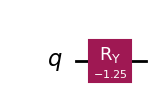

In [15]:
F1.draw(output='mpl', style='iqp')

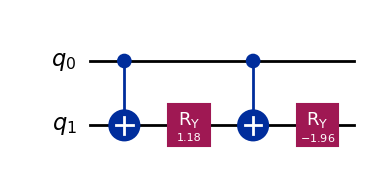

In [16]:
F2.draw(output='mpl', style='iqp')

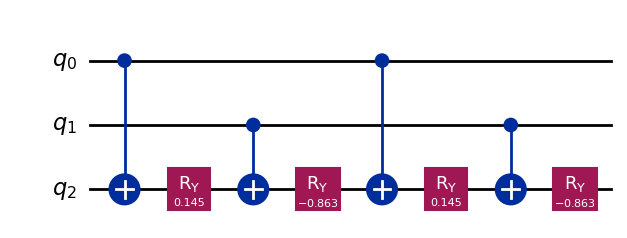

In [17]:
F3.draw(output='mpl', style='iqp')

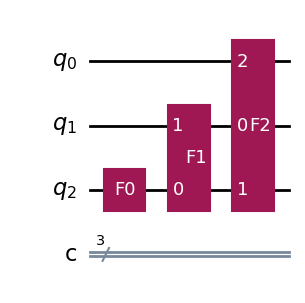

In [18]:
T_CBD3 = QuantumCircuit(3,3)
T_CBD3.append(F1, [2])
T_CBD3.append(F2, [2,1])
T_CBD3.append(F3, [1,2,0])

T_CBD3.draw(output='mpl', style='iqp')

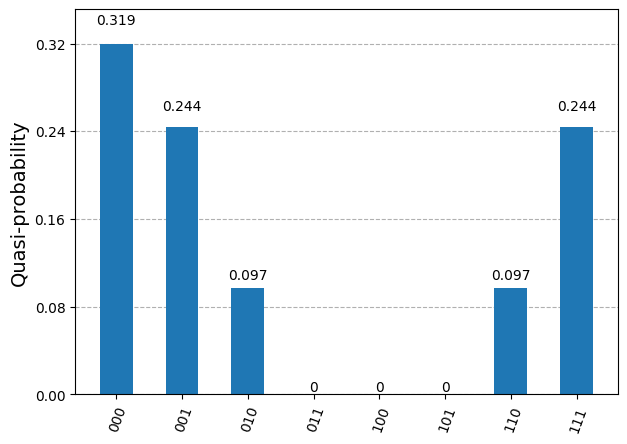

In [19]:
# When displaying or interpreting a list of bits (or qubits) as a string,
# bit n is the leftmost bit, and bit 0 is the rightmost bit.

zero = qi.Statevector.from_label('000')
sv = zero.evolve(T_CBD3)
probs = sv.probabilities_dict([0,1,2])
plot_distribution(probs)